In [49]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.svm import NuSVR


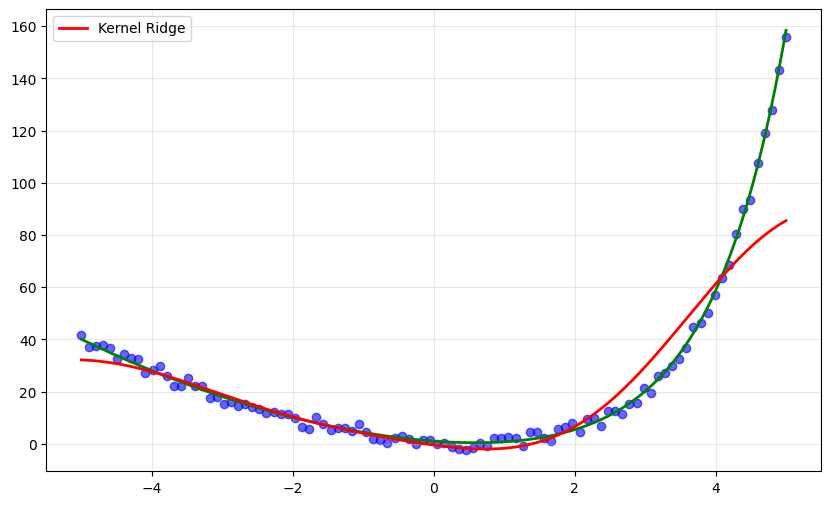

In [50]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)

e=np.random.uniform(-3,3,100)
y=np.exp(x.flatten())+x.flatten()**2-3*x.flatten()+e

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

krr = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.1)  
krr.fit(x_train, y_train)

x_plot = np.linspace(-5, 5, 500).reshape(-1, 1)
y_pred = krr.predict(x_plot)

plt.figure(figsize=(10, 6))


plt.scatter(x_train, y_train, color='blue', alpha=0.6)
plt.scatter(x_test, y_test, color='blue', alpha=0.6)


y_true = np.exp(x_plot.flatten()) + x_plot.flatten()**2 - 3 * x_plot.flatten()
plt.plot(x_plot, y_true, linewidth=2,color='g')


plt.plot(x_plot, y_pred, color='r', label='Kernel Ridge', linewidth=2)

plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

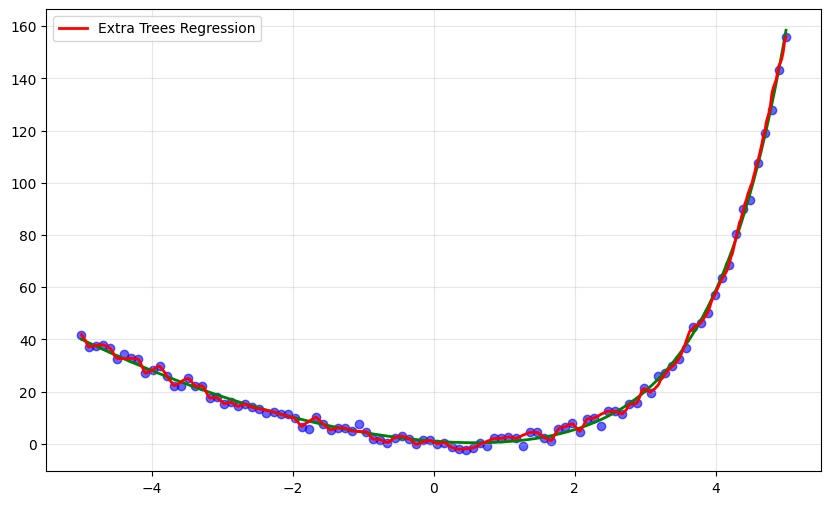

In [51]:
etr = ExtraTreesRegressor(
    n_estimators=100,  
    max_depth=None,  
    min_samples_split=2, 
    random_state=42)
etr.fit(x_train, y_train)


x_plot = np.linspace(-5, 5, 500).reshape(-1, 1)
y_pred = etr.predict(x_plot)

plt.figure(figsize=(10, 6))


plt.scatter(x_train, y_train, color='blue', alpha=0.6)
plt.scatter(x_test, y_test, color='blue', alpha=0.6)


y_true = np.exp(x_plot.flatten()) + x_plot.flatten()**2 - 3 * x_plot.flatten()
plt.plot(x_plot, y_true, linewidth=2,color='g')


plt.plot(x_plot, y_pred, color='r', label='Extra Trees Regression', linewidth=2)

plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

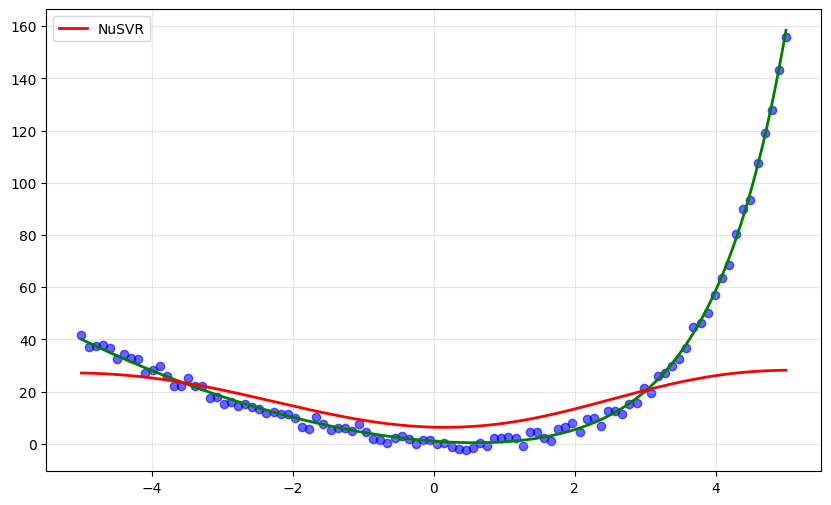

In [52]:
nsvr=NuSVR(nu=0.5,       
    C=1.0,        
    kernel='rbf',     
    gamma='scale')
nsvr.fit(x_train,y_train)

x_plot=np.linspace(-5,5,500)
y_pred=nsvr.predict(x_plot.reshape(-1,1))


plt.figure(figsize=(10, 6))


plt.scatter(x_train, y_train, color='blue', alpha=0.6)
plt.scatter(x_test, y_test, color='blue', alpha=0.6)


y_true = np.exp(x_plot.flatten()) + x_plot.flatten()**2 - 3 * x_plot.flatten()
plt.plot(x_plot, y_true, linewidth=2,color='g')


plt.plot(x_plot, y_pred, color='r', label='NuSVR', linewidth=2)

plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()
